**Remove stop word**
- Stop words are usually very common words in a language, like "và", "là", "đây", "trong" in Vietnamese. Because they appear frequently, they are often deemed to have little informational value in understanding the content or context of the text.
- Removing stop words helps reduce the noise in the data, which means getting rid of uninformative or irrelevant words. This can make downstream processes like machine learning or data analysis more efficient and focused on meaningful content.
- By eliminating these frequent, less informative words, computational resources can be concentrated on processing words that carry more meaning, thus improving the performance and speed of text-processing algorithms.

**1. Splitting Data Before Fit and Transform:**

**Advantages:**
- **Preventing Data Leakage**: By only fitting the `CountVectorizer`, `TfidfVectorizer` on the training set, you prevent information from the test set from influencing the model, which allows for a fairer evaluation.
- **More Realistic Evaluation**: The model doesn’t get to see the vocabulary in the test set in advance, so the evaluation more accurately reflects performance on unseen data.

**Disadvantages:**
- **Incomplete Vocabulary**: If there are words present in the test set but not in the training set, the model will not recognize them, potentially leading to poorer performance during prediction.
- **Possibly Suboptimal Model**: Because the model is trained only on a portion of the vocabulary, it might miss out on learning important relationships between words and labels.

**2. Fit and Transform After Splitting Data:**

**Advantages:**
- **Complete Vocabulary**: Fitting the `CountVectorizer`, `TfidfVectorizer` on the entire dataset ensures that the vocabulary will include every word in both the training and testing sets.
- **Feature Consistency**: This ensures that each word has the same feature index in both sets, simplifying the model evaluation process.

**Disadvantages:**
- **Potential for Data Leakage**: Fitting on the entire dataset might lead to information from the test set "leaking" into the training set, making the performance evaluation overly optimistic.
- **May Not Reflect Performance on New Data**: The model might not perform well on new data if it relies on a vocabulary built from both the training and test datasets.

In our project, we **choose splitting data before fit and transform** choose splitting data before fit and transform because we're concerned about potential data leakage and want to ensure that our models evaluation is as realistic as possible

**1.** Naive Bayes classifiers, particularly the Multinomial Naive Bayes variant, are often based on the bag-of-words model which assumes that the frequency (count) of each word in the document is important. The probability of each word occurring in a document is assumed to be independent of each other (the 'naive' assumption). Therefore, Multinomial Naive Bayes works well with frequency counts as features because it specifically models the probability of each class based on the frequency of words. Therefore, **it is much more better when we combine Multinomial Naive Bayes with CountVectorizer** than TfidfVectorizer.

**2.** On the other hands, **it is much more better when we combine other models with TfidfVectorizer**


# Vietnamese Article Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_path = '/content/drive/My Drive/CS332_Intro_ML/Data_Project_Text_Processing'

In [ ]:
!pip install underthesea

In [ ]:
import os
import re
import pandas as pd

In [ ]:
from underthesea import word_tokenize

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install scikit-learn


## Load Data

In [ ]:
def load_articles(root_folder):
    # Initialize an empty DataFrame
    df = pd.DataFrame(columns=['content', 'category'])

    # Iterate through each subfolder
    for category in os.listdir(root_folder):
        category_path = os.path.join(root_folder, category)

        # Check if it's a directory
        if os.path.isdir(category_path):
            # Iterate through each file in the subfolder
            for file in os.listdir(category_path):
                file_path = os.path.join(category_path, file)

                # Read the content of the file
                with open(file_path, 'r', encoding='utf-8') as f:
                    content = f.read()

                # Special handling for 'Sport' category
                if category == 'Sport':
                    content = '\n'.join(content.split('\n')[1:])  # Remove the first line, which contrains spoiler (Sport_x)
                    # Remove the phrase "(Dân trí)"
                    content = content.replace("(Dân trí)", "")

                # Append to DataFrame
                df = pd.concat([df, pd.DataFrame({'content': [content], 'category': [category]})], ignore_index=True)

    return df

In [ ]:
# Process the files and get the DataFrame
data = load_articles(base_path)

# Display the first few rows of the DataFrame
data.head()


,content,category
0,Dự báo đêm nhạc Westlife 'tạo sóng' cho du lịc...,DuLich
1,Trải nghiệm cung đường tàu hoả đẹp nhất Việt N...,DuLich
2,Bà Rịa - Vũng Tàu phát triển du lịch ch...,DuLich
3,Đi bộ tham quan kinh đô cổ tráng lệ bậc nhất c...,DuLich
4,Du khách Mỹ mê mẩn nhà vệ sinh Nhật Bản\nNữ du...,DuLich


In [ ]:
data.category.value_counts()

DuLich             35
KinhTe-TaiChinh    35
Sport              35
movies             35
Fashion            35
Health             35
amthuc             35
Name: category, dtype: int64

In [ ]:
# Check the first few rows of the 'Sport' category to ensure the first line and "Dan tri" is removed
sport_rows = data[data['category'] == 'Sport']
sport_rows.head()

,content,category
70,- Trước giải vô địch bóng đá châu Á Asian Cup...,Sport
71,- Với cú đúp vào lưới Man Utd trong chiến thắ...,Sport
72,- Lần đầu tiên trong lịch sử Man Utd để thua ...,Sport
73,- Được sự ủy quyền của Liên đoàn golf Châu Á ...,Sport
74,- Liên đoàn bóng đá Anh (FA) bất ngờ chọn trọ...,Sport


## Text Preprocessing

### Clean Text

In [ ]:
def clean_text(text):
    # Lowercasing
    text = text.lower()
    # Tokenization for Vietnamese
    text = word_tokenize(text, format="text")
    # Removing punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Removing numbers
    text = re.sub(r'\d+', '', text)
    # Removing extra spaces and blank lines
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
data['clean_content'] = data['content'].apply(clean_text)
data['clean_content_token_count'] = data['clean_content'].str.split().apply(len)

data.head()

,content,category,clean_content,clean_content_token_count
0,Dự báo đêm nhạc Westlife 'tạo sóng' cho du lịc...,DuLich,dự_báo đêm nhạc_westlife tạo sóng cho du_lịch ...,440
1,Trải nghiệm cung đường tàu hoả đẹp nhất Việt N...,DuLich,trải_nghiệm cung đường tàu hỏa đẹp nhất việt_n...,556
2,Bà Rịa - Vũng Tàu phát triển du lịch ch...,DuLich,bà rịa vũng tàu phát_triển du_lịch chất_lượng ...,239
3,Đi bộ tham quan kinh đô cổ tráng lệ bậc nhất c...,DuLich,đi bộ tham_quan kinh_đô cổ_tráng_lệ bậc nhất c...,471
4,Du khách Mỹ mê mẩn nhà vệ sinh Nhật Bản\nNữ du...,DuLich,du_khách mỹ_mê mẩn nhà_vệ_sinh nhật_bản nữ du_...,416


In [ ]:
data.tail()


,content,category,clean_content,clean_content_token_count
240,Món mì ramen chân cá sấu muốn ăn phải đặt trướ...,amthuc,món mì ramen chân cá_sấu muốn ăn phải đặt trướ...,281
241,"Nguyên tắc uống cà phê tại Italy\nTại Italy, n...",amthuc,nguyên_tắc uống cà_phê tại italy tại italy ngư...,410
242,Quán bánh cuốn cà cuống Thanh Trì gia truyền 4...,amthuc,quán bánh_cuốn cà_cuống thanh_trì gia_truyền t...,947
243,Quán bánh đa cua bề bề gần 40 năm ở Hải Phòng\...,amthuc,quán bánh đa_cua bề_bề gần năm ở hải_phòng quá...,1181
244,Món ăn đường phố nhất định phải thử khi đến Tr...,amthuc,món ăn đường_phố nhất_định phải thử khi đến tr...,702


In [ ]:
sport_rows = data[data['category'] == 'Sport']
sport_rows.head()

,content,category,clean_content,clean_content_token_count
70,- Trước giải vô địch bóng đá châu Á Asian Cup...,Sport,trước giải_vô_địch_bóng_đá châu_á asian cup di...,327
71,- Với cú đúp vào lưới Man Utd trong chiến thắ...,Sport,với cú đúp vào lưới man_utd trong chiến_thắng ...,364
72,- Lần đầu tiên trong lịch sử Man Utd để thua ...,Sport,lần đầu_tiên trong lịch_sử man_utd để thua ở c...,435
73,- Được sự ủy quyền của Liên đoàn golf Châu Á ...,Sport,được sự ủy_quyền của liên_đoàn golf châu_á thá...,362
74,- Liên đoàn bóng đá Anh (FA) bất ngờ chọn trọ...,Sport,liên_đoàn bóng_đá anh fa bất_ngờ chọn trọng_tà...,275


In [ ]:
data.describe()

,clean_content_token_count
count,245.000000
mean,505.065306
std,229.673422
min,16.000000
25%,342.000000
50%,444.000000
75%,598.000000
max,1258.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   content                    245 non-null    object
 1   category                   245 non-null    object
 2   clean_content              245 non-null    object
 3   clean_content_token_count  245 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 7.8+ KB


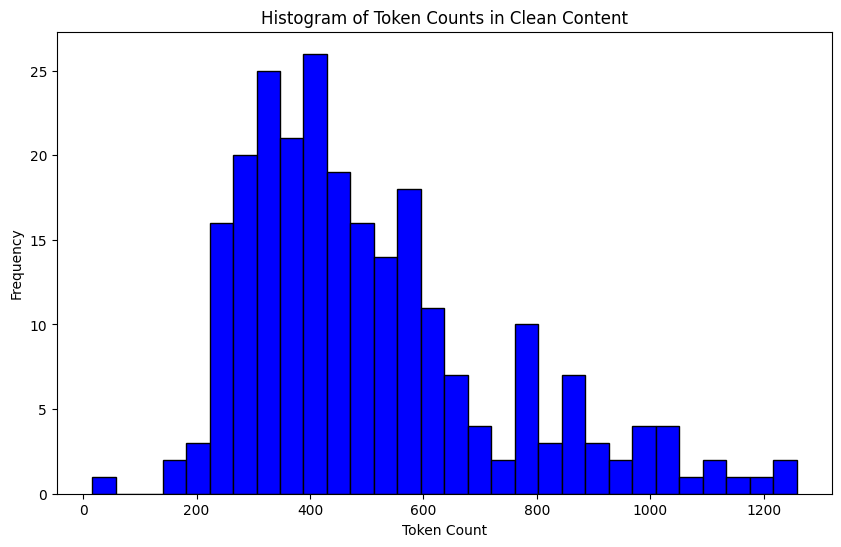

In [ ]:

token_counts = data['clean_content_token_count']

plt.figure(figsize=(10, 6))
plt.hist(token_counts, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Token Counts in Clean Content')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.show()


### Remove stopwords

source: https://www.kaggle.com/code/mpwolke/vietnamese-stopwords-w2v/input

In [ ]:
stopwords_dash_path = '/content/drive/My Drive/CS332_Intro_ML/Group/Group_Lanh_Phuong_Anh/vietnamese-stopwords-dash.txt'
with open(stopwords_dash_path, 'r', encoding='utf-8') as file:
    vietnamese_stopwords = file.read().splitlines()
vietnamese_stopwords[:10]

['a_lô',
 'a_ha',
 'ai',
 'ai_ai',
 'ai_nấy',
 'ai_đó',
 'alô',
 'amen',
 'anh',
 'anh_ấy']

In [ ]:
def remove_stopwords(text):
    # Split the text into tokens
    tokens = text.split()
    # Remove tokens that are in the stopwords list
    tokens_without_stopwords = [word for word in tokens if word not in vietnamese_stopwords]
    # Join the tokens back into a string
    return ' '.join(tokens_without_stopwords)


In [ ]:
# Apply the function to the 'clean_content' column
data['processed_content'] = data['clean_content'].apply(remove_stopwords)
data['processed_content_token_count'] = data['processed_content'].str.split().apply(len)


In [ ]:
data.head()


,content,category,clean_content,clean_content_token_count,processed_content,processed_content_token_count
0,Dự báo đêm nhạc Westlife 'tạo sóng' cho du lịc...,DuLich,dự_báo đêm nhạc_westlife tạo sóng cho du_lịch ...,440,dự_báo đêm nhạc_westlife sóng du_lịch tp hcm c...,242
1,Trải nghiệm cung đường tàu hoả đẹp nhất Việt N...,DuLich,trải_nghiệm cung đường tàu hỏa đẹp nhất việt_n...,556,trải_nghiệm cung đường tàu hỏa đẹp việt_nam ch...,290
2,Bà Rịa - Vũng Tàu phát triển du lịch ch...,DuLich,bà rịa vũng tàu phát_triển du_lịch chất_lượng ...,239,rịa vũng tàu phát_triển du_lịch chất_lượng chỗ...,143
3,Đi bộ tham quan kinh đô cổ tráng lệ bậc nhất c...,DuLich,đi bộ tham_quan kinh_đô cổ_tráng_lệ bậc nhất c...,471,đi tham_quan kinh_đô cổ_tráng_lệ bậc châu_âu t...,260
4,Du khách Mỹ mê mẩn nhà vệ sinh Nhật Bản\nNữ du...,DuLich,du_khách mỹ_mê mẩn nhà_vệ_sinh nhật_bản nữ du_...,416,du_khách mỹ_mê mẩn nhà_vệ_sinh nhật_bản nữ du_...,200


In [ ]:
data.tail()

,content,category,clean_content,clean_content_token_count,processed_content,processed_content_token_count
240,Món mì ramen chân cá sấu muốn ăn phải đặt trướ...,amthuc,món mì ramen chân cá_sấu muốn ăn phải đặt trướ...,281,món mì ramen chân cá_sấu tiệm mì đài_loan sáng...,161
241,"Nguyên tắc uống cà phê tại Italy\nTại Italy, n...",amthuc,nguyên_tắc uống cà_phê tại italy tại italy ngư...,410,nguyên_tắc uống cà_phê italy italy người_dân q...,180
242,Quán bánh cuốn cà cuống Thanh Trì gia truyền 4...,amthuc,quán bánh_cuốn cà_cuống thanh_trì gia_truyền t...,947,quán bánh_cuốn cà_cuống thanh_trì gia_truyền t...,485
243,Quán bánh đa cua bề bề gần 40 năm ở Hải Phòng\...,amthuc,quán bánh đa_cua bề_bề gần năm ở hải_phòng quá...,1181,quán bánh đa_cua bề_bề hải_phòng quán bánh đa_...,612
244,Món ăn đường phố nhất định phải thử khi đến Tr...,amthuc,món ăn đường_phố nhất_định phải thử khi đến tr...,702,món đường_phố thử trung_quốc chục nghìn đồng n...,359


In [ ]:
data.describe()

,clean_content_token_count,processed_content_token_count
count,245.000000,245.000000
mean,505.065306,267.910204
std,229.673422,121.055976
min,16.000000,12.000000
25%,342.000000,176.000000
50%,444.000000,238.000000
75%,598.000000,323.000000
max,1258.000000,633.000000


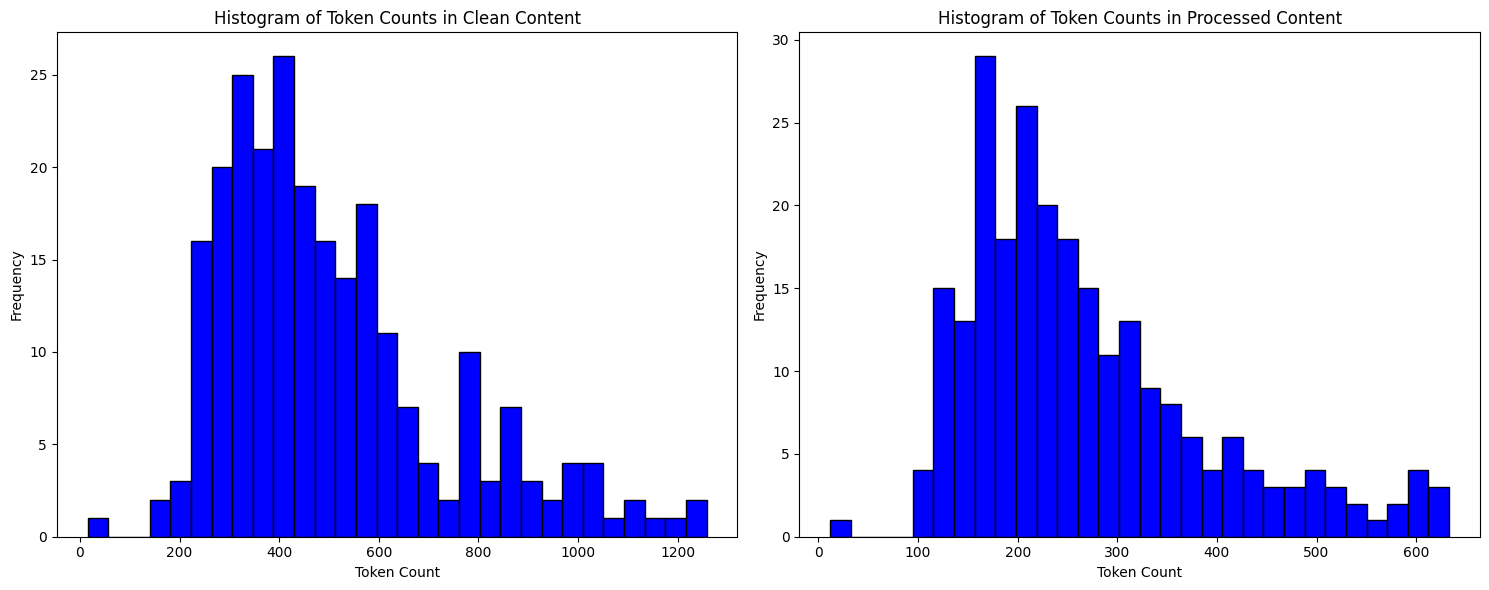

In [ ]:
processed_token_counts = data['processed_content_token_count']
clean_token_counts = data['clean_content_token_count']

# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the histogram for processed_word_counts on the first subplot
ax1.hist(clean_token_counts, bins=30, color='blue', edgecolor='black')
ax1.set_title('Histogram of Token Counts in Clean Content')
ax1.set_xlabel('Token Count')
ax1.set_ylabel('Frequency')

# Plotting the histogram for clean_word_counts on the second subplot
ax2.hist(processed_token_counts, bins=30, color='blue', edgecolor='black')
ax2.set_title('Histogram of Token Counts in Processed Content')
ax2.set_xlabel('Token Count')
ax2.set_ylabel('Frequency')

# Display the plots side by side
plt.tight_layout()
plt.show()


## Vector Embedding

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = data['processed_content']
y = data['category']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vec = vectorizer.transform(X_test)


In [ ]:
X_train_vec.shape, type(X_train_vec)

((196, 9494), scipy.sparse._csr.csr_matrix)

In [ ]:
X_train_vec.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_train_vec[0].todense()


matrix([[0, 0, 0, ..., 0, 0, 0]])

### Tf-idf Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
X_train_tfidf.shape, type(X_train_tfidf)

((196, 9494), scipy.sparse._csr.csr_matrix)

In [ ]:
X_train_tfidf.todense()


matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.05025489,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
X_train_tfidf[0].todense()


matrix([[0., 0., 0., ..., 0., 0., 0.]])

## Modeling

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

#### Count Vectorizer

In [ ]:
# Initialize the SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train_vec, y_train)

# Predict on the test set
svm_predictions = svm_model.predict(X_test_vec)

# Evaluate the model
print("SVM Classification Report with Count Vectorizer:")
print(classification_report(y_test, svm_predictions))


SVM Classification Report with Count Vectorizer:
                 precision    recall  f1-score   support

         DuLich       0.91      0.91      0.91        11
        Fashion       0.50      0.83      0.62         6
         Health       1.00      0.78      0.88         9
KinhTe-TaiChinh       1.00      1.00      1.00         5
          Sport       1.00      1.00      1.00         5
         amthuc       1.00      1.00      1.00         4
         movies       0.86      0.67      0.75         9

       accuracy                           0.86        49
      macro avg       0.90      0.88      0.88        49
   weighted avg       0.89      0.86      0.86        49



#### Tf-idf Vectorizer

In [ ]:
# Initialize and train the SVM model
svm_model_tfidf = SVC()
svm_model_tfidf.fit(X_train_tfidf, y_train)

# Predict on the test set
svm_predictions_tfidf = svm_model_tfidf.predict(X_test_tfidf)

# Evaluate the model
print("SVM Classification Report with TF-IDF:")
print(classification_report(y_test, svm_predictions_tfidf))


SVM Classification Report with TF-IDF:
                 precision    recall  f1-score   support

         DuLich       1.00      1.00      1.00        11
        Fashion       1.00      0.83      0.91         6
         Health       1.00      0.89      0.94         9
KinhTe-TaiChinh       1.00      1.00      1.00         5
          Sport       1.00      1.00      1.00         5
         amthuc       0.80      1.00      0.89         4
         movies       0.90      1.00      0.95         9

       accuracy                           0.96        49
      macro avg       0.96      0.96      0.96        49
   weighted avg       0.97      0.96      0.96        49



#### Grid Search

To find best combination of Hyperparameters


In [ ]:
# Define hyperparameter space
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [ ]:
# Initialize the SVM classifier
svm_model = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training set
grid_search.fit(X_train_tfidf, y_train)

# Print the best parameters
print("Best parameters found:", grid_search.best_params_)


Best parameters found: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
### Count Vectorizer

# Train the classifier on the training set using the best parameters
best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train_vec, y_train)

# Predict the categories of the testing set
y_pred_svm = best_svm_model.predict(X_test_vec)

# Calculate the accuracy on the testing set
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print the accuracy
print("Accuracy on the testing set with best parameters:", accuracy_svm)


Accuracy on the testing set with best parameters: 0.8979591836734694


In [ ]:
### TF-IDF

# Train the classifier on the training set using the best parameters
best_svm_model_tfidf = grid_search.best_estimator_
best_svm_model_tfidf.fit(X_train_tfidf, y_train)

# Predict the categories of the testing set
y_pred_svm = best_svm_model_tfidf.predict(X_test_tfidf)

# Calculate the accuracy on the testing set
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print the accuracy
print("Accuracy on the testing set with best parameters:", accuracy_svm)

Accuracy on the testing set with best parameters: 0.9795918367346939


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB


#### Count Vectorizer

In [ ]:
# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_vec, y_train)

# Predict on the test set
nb_predictions = nb_model.predict(X_test_vec)

# Evaluate the model
print("Naive Bayes Classification Report with Count Vectorizer:")
print(classification_report(y_test, nb_predictions))


Naive Bayes Classification Report with Count Vectorizer:
                 precision    recall  f1-score   support

         DuLich       1.00      1.00      1.00        11
        Fashion       1.00      0.83      0.91         6
         Health       1.00      0.89      0.94         9
KinhTe-TaiChinh       1.00      1.00      1.00         5
          Sport       1.00      1.00      1.00         5
         amthuc       0.80      1.00      0.89         4
         movies       0.90      1.00      0.95         9

       accuracy                           0.96        49
      macro avg       0.96      0.96      0.96        49
   weighted avg       0.97      0.96      0.96        49



#### Tf-idf Vectoizer

In [ ]:
# Initialize the Naive Bayes model
nb_model_tfidf = MultinomialNB()

# Train the model
nb_model_tfidf.fit(X_train_tfidf, y_train)

# Predict on the test set
nb_predictions = nb_model_tfidf.predict(X_test_tfidf)

# Evaluate the model
print("Naive Bayes Classification Report with TF-IDF:")
print(classification_report(y_test, nb_predictions))


Naive Bayes Classification Report with TF-IDF:
                 precision    recall  f1-score   support

         DuLich       1.00      0.91      0.95        11
        Fashion       1.00      0.83      0.91         6
         Health       1.00      0.89      0.94         9
KinhTe-TaiChinh       0.83      1.00      0.91         5
          Sport       1.00      1.00      1.00         5
         amthuc       0.80      1.00      0.89         4
         movies       0.90      1.00      0.95         9

       accuracy                           0.94        49
      macro avg       0.93      0.95      0.94        49
   weighted avg       0.95      0.94      0.94        49



#### Grid Search


In [ ]:
# Define hyperparameter space
param_grid_nb = {
    'alpha': [0.5, 1, 2, 3],
    'fit_prior': [True, False]
}

In [ ]:
# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Create GridSearchCV object
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=5, scoring='accuracy')

# Perform grid search on the training set
grid_search_nb.fit(X_train_tfidf, y_train)

# Print the best parameters
print("Best parameters found for Naive Bayes:", grid_search_nb.best_params_)


Best parameters found for Naive Bayes: {'alpha': 1, 'fit_prior': False}


In [ ]:
### Count Vectorizer
# Train the classifier on the training set using the best parameters
best_nb_model = grid_search_nb.best_estimator_
best_nb_model.fit(X_train_vec, y_train)

# Predict the categories of the testing set
y_pred_nb = best_nb_model.predict(X_test_vec)

# Calculate the accuracy on the testing set
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Print the accuracy
print("Accuracy on the testing set with best parameters (Naive Bayes):", accuracy_nb)


Accuracy on the testing set with best parameters (Naive Bayes): 0.9591836734693877


In [ ]:
### TF-IDF
# Train the classifier on the training set using the best parameters
best_nb_model_tfidf = grid_search_nb.best_estimator_
best_nb_model_tfidf.fit(X_train_tfidf, y_train)

# Predict the categories of the testing set
y_pred_nb = best_nb_model_tfidf.predict(X_test_tfidf)

# Calculate the accuracy on the testing set
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Print the accuracy
print("Accuracy on the testing set with best parameters (Naive Bayes):", accuracy_nb)


Accuracy on the testing set with best parameters (Naive Bayes): 0.9591836734693877


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


#### Count Vectorizer

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_vec, y_train)
dt_predictions = dt_model.predict(X_test_vec)
print("Decision Tree Classification Report with Count Vectorizer:")
print(classification_report(y_test, dt_predictions))


Decision Tree Classification Report with Count Vectorizer:
                 precision    recall  f1-score   support

         DuLich       0.90      0.82      0.86        11
        Fashion       1.00      0.67      0.80         6
         Health       0.86      0.67      0.75         9
KinhTe-TaiChinh       0.57      0.80      0.67         5
          Sport       1.00      0.80      0.89         5
         amthuc       0.50      0.75      0.60         4
         movies       0.82      1.00      0.90         9

       accuracy                           0.80        49
      macro avg       0.81      0.79      0.78        49
   weighted avg       0.83      0.80      0.80        49



In [ ]:
print("Decision Tree Hyperparameters:")
print(f"Max Depth: {dt_model.get_params()['max_depth']}")
print(f"Min Samples Split: {dt_model.get_params()['min_samples_split']}")
print(f"Min Samples Leaf: {dt_model.get_params()['min_samples_leaf']}")


Decision Tree Hyperparameters:
Max Depth: None
Min Samples Split: 2
Min Samples Leaf: 1


#### Tf-idf Vectorizer

In [ ]:
dt_model_tfidf = DecisionTreeClassifier()
dt_model_tfidf.fit(X_train_tfidf, y_train)
dt_predictions = dt_model_tfidf.predict(X_test_tfidf)
print("Decision Tree Classification Report with TF-IDF:")
print(classification_report(y_test, dt_predictions))


Decision Tree Classification Report with TF-IDF:
                 precision    recall  f1-score   support

         DuLich       0.90      0.82      0.86        11
        Fashion       1.00      0.83      0.91         6
         Health       1.00      0.56      0.71         9
KinhTe-TaiChinh       0.80      0.80      0.80         5
          Sport       1.00      1.00      1.00         5
         amthuc       0.50      1.00      0.67         4
         movies       0.82      1.00      0.90         9

       accuracy                           0.84        49
      macro avg       0.86      0.86      0.84        49
   weighted avg       0.88      0.84      0.84        49



In [ ]:
print("Decision Tree Hyperparameters:")
print(f"Max Depth: {dt_model_tfidf.get_params()['max_depth']}")
print(f"Min Samples Split: {dt_model_tfidf.get_params()['min_samples_split']}")
print(f"Min Samples Leaf: {dt_model_tfidf.get_params()['min_samples_leaf']}")


Decision Tree Hyperparameters:
Max Depth: None
Min Samples Split: 2
Min Samples Leaf: 1


#### Grid Search

In [ ]:
param_grid_dt = {
    'max_depth': [None, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Create GridSearchCV object
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')

# Perform grid search on the training set
grid_search_dt.fit(X_train_tfidf, y_train)

# Print the best parameters
print("Best parameters found for Decision Tree:", grid_search_dt.best_params_)

Best parameters found for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [ ]:
### Count Vectorizer

# Train the classifier on the training set using the best parameters
best_dt_model = grid_search_dt.best_estimator_
best_dt_model.fit(X_train_vec, y_train)

# Predict the categories of the testing set
y_pred_dt = best_dt_model.predict(X_test_vec)

# Calculate the accuracy on the testing set
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the accuracy
print("Accuracy on the testing set with best parameters (Decision Tree):", accuracy_dt)


Accuracy on the testing set with best parameters (Decision Tree): 0.7959183673469388


In [ ]:
### TF-IDF

# Train the classifier on the training set using the best parameters
best_dt_model_tfidf = grid_search_dt.best_estimator_
best_dt_model_tfidf.fit(X_train_tfidf, y_train)

# Predict the categories of the testing set
y_pred_dt = best_dt_model_tfidf.predict(X_test_tfidf)

# Calculate the accuracy on the testing set
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the accuracy
print("Accuracy on the testing set with best parameters (Decision Tree):", accuracy_dt)


Accuracy on the testing set with best parameters (Decision Tree): 0.8163265306122449


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


#### Count Vectorizer

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vec, y_train)
rf_predictions = rf_model.predict(X_test_vec)
print("Random Forest Classification Report with Count Vectorizer:")
print(classification_report(y_test, rf_predictions))


Random Forest Classification Report with Count Vectorizer:
                 precision    recall  f1-score   support

         DuLich       1.00      1.00      1.00        11
        Fashion       1.00      0.83      0.91         6
         Health       1.00      1.00      1.00         9
KinhTe-TaiChinh       1.00      1.00      1.00         5
          Sport       1.00      1.00      1.00         5
         amthuc       1.00      1.00      1.00         4
         movies       0.90      1.00      0.95         9

       accuracy                           0.98        49
      macro avg       0.99      0.98      0.98        49
   weighted avg       0.98      0.98      0.98        49



#### Tf-idf Vectorizer

In [ ]:
rf_model_tfidf = RandomForestClassifier()
rf_model_tfidf.fit(X_train_tfidf, y_train)
rf_predictions = rf_model_tfidf.predict(X_test_tfidf)
print("Random Forest Classification Report with TF-IDF:")
print(classification_report(y_test, rf_predictions))


Random Forest Classification Report with TF-IDF:
                 precision    recall  f1-score   support

         DuLich       1.00      0.91      0.95        11
        Fashion       1.00      0.83      0.91         6
         Health       1.00      1.00      1.00         9
KinhTe-TaiChinh       0.83      1.00      0.91         5
          Sport       1.00      1.00      1.00         5
         amthuc       1.00      1.00      1.00         4
         movies       0.90      1.00      0.95         9

       accuracy                           0.96        49
      macro avg       0.96      0.96      0.96        49
   weighted avg       0.96      0.96      0.96        49



#### Grid Search

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Create GridSearchCV object
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')

# Perform grid search on the training set
grid_search_rf.fit(X_train_tfidf, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Print the best parameters
print("Best parameters found for Random Forest:", grid_search_rf.best_params_)

Best parameters found for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
### TF-IDF

# Train the classifier on the training set using the best parameters
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train_vec, y_train)

# Predict the categories of the testing set
y_pred_rf = best_rf_model.predict(X_test_vec)

# Calculate the accuracy on the testing set
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the accuracy
print("Accuracy on the testing set with best parameters (Random Forest):", accuracy_rf)


Accuracy on the testing set with best parameters (Random Forest): 0.9387755102040817


In [ ]:
### TF-IDF

# Train the classifier on the training set using the best parameters
best_rf_model_tfidf = grid_search_rf.best_estimator_
best_rf_model_tfidf.fit(X_train_tfidf, y_train)

# Predict the categories of the testing set
y_pred_rf = best_rf_model_tfidf.predict(X_test_tfidf)

# Calculate the accuracy on the testing set
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the accuracy
print("Accuracy on the testing set with best parameters (Random Forest):", accuracy_rf)


Accuracy on the testing set with best parameters (Random Forest): 0.9591836734693877


### XGBoost Classifier

In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBClassifier


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


#### Count Vectorizer

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_vec, y_train_encoded)
xgb_predictions_encoded = xgb_model.predict(X_test_vec)

# Decode the predictions back to original labels
xgb_predictions = label_encoder.inverse_transform(xgb_predictions_encoded)

print("XGBoost Classification Report with Count Vectorizer:")
print(classification_report(y_test, xgb_predictions))


XGBoost Classification Report with Count Vectorizer:
                 precision    recall  f1-score   support

         DuLich       0.91      0.91      0.91        11
        Fashion       0.83      0.83      0.83         6
         Health       1.00      0.78      0.88         9
KinhTe-TaiChinh       1.00      1.00      1.00         5
          Sport       1.00      0.80      0.89         5
         amthuc       0.50      0.75      0.60         4
         movies       0.90      1.00      0.95         9

       accuracy                           0.88        49
      macro avg       0.88      0.87      0.86        49
   weighted avg       0.90      0.88      0.88        49



#### Tf-idf Vectorizer

In [ ]:
xgb_model_tfidf = XGBClassifier()
xgb_model_tfidf.fit(X_train_tfidf, y_train_encoded)
xgb_predictions_encoded = xgb_model_tfidf.predict(X_test_tfidf)

# Decode the predictions back to original labels
xgb_predictions = label_encoder.inverse_transform(xgb_predictions_encoded)

print("XGBoost Classification Report with TF-IDF:")
print(classification_report(y_test, xgb_predictions))


XGBoost Classification Report with TF-IDF:
                 precision    recall  f1-score   support

         DuLich       1.00      0.82      0.90        11
        Fashion       1.00      0.83      0.91         6
         Health       1.00      0.89      0.94         9
KinhTe-TaiChinh       1.00      1.00      1.00         5
          Sport       1.00      1.00      1.00         5
         amthuc       0.57      1.00      0.73         4
         movies       0.90      1.00      0.95         9

       accuracy                           0.92        49
      macro avg       0.92      0.93      0.92        49
   weighted avg       0.95      0.92      0.92        49



### Ensemble Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

#### Count Vectorizer

In [ ]:
# Create a list of models

estimators = [
    ('svm', best_svm_model),
    ('nb', best_nb_model),
    # ('dt', dt_model),
    ('rf', best_rf_model),
    # ('xgb', xgb_model)
]

# Create the ensemble model
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train_vec, y_train)
ensemble_predictions = ensemble.predict(X_test_vec)
print("Ensemble Voting Classification Report:")
print(classification_report(y_test, ensemble_predictions))


Ensemble Voting Classification Report:
                 precision    recall  f1-score   support

         DuLich       1.00      1.00      1.00        11
        Fashion       1.00      0.83      0.91         6
         Health       1.00      0.89      0.94         9
KinhTe-TaiChinh       1.00      1.00      1.00         5
          Sport       1.00      1.00      1.00         5
         amthuc       0.80      1.00      0.89         4
         movies       0.90      1.00      0.95         9

       accuracy                           0.96        49
      macro avg       0.96      0.96      0.96        49
   weighted avg       0.97      0.96      0.96        49



#### Tf-idf Vectorizer

In [ ]:
# Create a list of models
tfidf_estimators = [
    ('svm', best_svm_model_tfidf),
    ('nb', best_nb_model_tfidf),
    # ('dt', dt_model_tfidf),
    ('rf', best_rf_model_tfidf),
    # ('xgb', xgb_model_tfidf)
]

# Create the ensemble model
ensemble = VotingClassifier(tfidf_estimators, voting='hard')
ensemble.fit(X_train_tfidf, y_train)
ensemble_predictions = ensemble.predict(X_test_tfidf)
print("Ensemble Voting Classification Report:")
print(classification_report(y_test, ensemble_predictions))


Ensemble Voting Classification Report:
                 precision    recall  f1-score   support

         DuLich       1.00      1.00      1.00        11
        Fashion       1.00      0.83      0.91         6
         Health       1.00      1.00      1.00         9
KinhTe-TaiChinh       1.00      1.00      1.00         5
          Sport       1.00      1.00      1.00         5
         amthuc       1.00      1.00      1.00         4
         movies       0.90      1.00      0.95         9

       accuracy                           0.98        49
      macro avg       0.99      0.98      0.98        49
   weighted avg       0.98      0.98      0.98        49

